# Finding Heavy Traffic Indicators on I-94

In this project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

## Goal

* We wish to determine indicators of heavy traffic on I-94.

## Result Summary

We find out that there are two type of heave traffic indicators:
* Time:
    * The traffic tends to be heavier during the day
    * The traffic is heavier during weekdays, especially around 7 AM or 4 PM
    * The traffic is heavier during the warmer months
* Weather:
    * Suprisingly, the traffic is heavier when the weather is slightly bad

For more details, please refer to the the full analysis below.

## The I-94 Traffic Dataset

In [20]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset contains 48204 entries, and 9 columns. There is no null value. Each row of the dataset describes traffic or weather condition of a specific time. We have the data from 9:00 02/10/2012 to 23:00 09/30/2018. 

## Initial Analysis of Traffic Volume

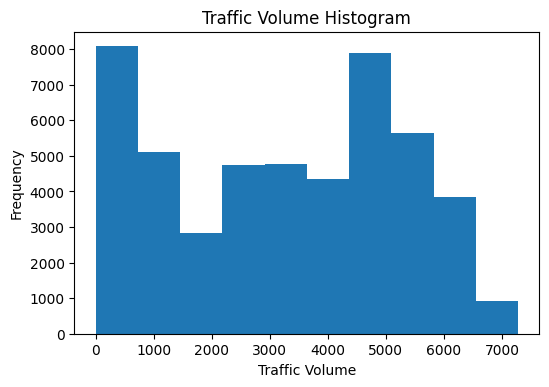

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
i_94['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Traffic Volume Histogram')
plt.show()

In [10]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 9:00 02/10/2012 and 23:00 09/30/2018 the traffic volumn that passed through the station ranged from 0 to 7280 cars, with about 3260 cars on average.

About 25% of the time, the traffic volume is relatively low with about 1193 cars or less, but also about 25% the station saw heavy traffic with about 4933 cars or more which is about 4 times as much. We suspect this drastic difference may be due to the influence of daytime or nighttime.

So let us verify our hypothesis.

## Traffic Volume in Daytime vs Nighttime

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [44]:
# Transform the date_time column to datetime
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
# filtering day and night data:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print("Number of day entries:", day.shape[0])
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print("Number of night entries:", night.shape[0])

Number of day entries: 23877
Number of night entries: 24327


<function matplotlib.pyplot.show(*args, **kw)>

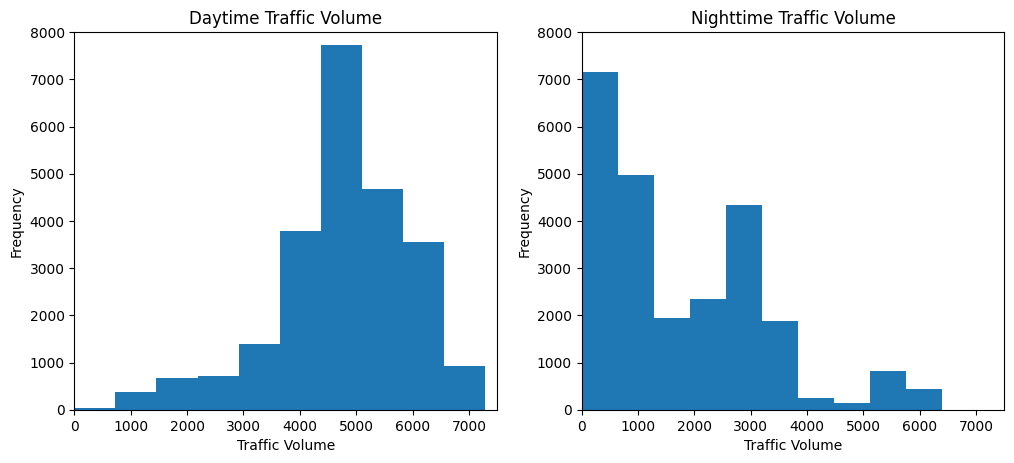

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Daytime Traffic Volume')
plt.xlim([0, 7500])
plt.ylim([0, 8000])
plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.title('Nighttime Traffic Volume')
plt.xlim([0, 7500])
plt.ylim([0, 8000])

plt.show

In [41]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [40]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Base on the data, we observe that:
*  The histogram of the daytime traffic volume skew left. This means that most of the traffic volume values are high. Indeed, the daytime data indicates that 75% of the time the the traffic volume is over 4252 car. 

* On the other hand, the histogram of nighttime traffic volumn skew right, this means most of the time the traffic is low. The data indicate that only 25% of the time the traffic volume surpass 2818 cars during the night.

Since the traffic is significantly heavier during the day, and our goal is to find indicators of heavy traffic, we shall shift our attention away from the daytime data and toward daytime data.

## Time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

### Month

In [45]:
# Calculate the average traffic volume by moth
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

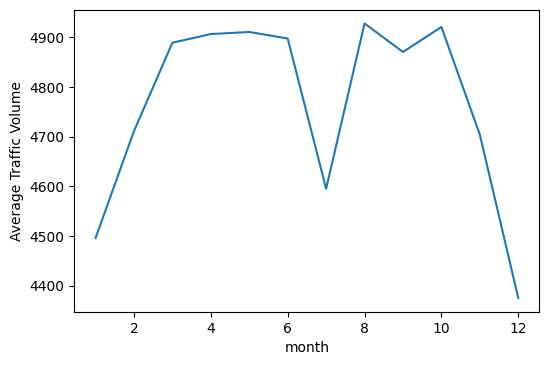

In [61]:
by_month['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.show()

From the plot we can observe that:
    
* In general, as the weather is getting warmer (from January to March), the traffic volume also steadily increases, stays high during the warm month (from March to October), and then sharply decreases during the cold month (from November to February).

* On interesting exception which warrent further investigation is the traffic volume also sharply drop in July.

Let's see how the traffic volume changed each year in July.

In [56]:
day['year'] = day['date_time'].dt.year
july = day[day['month']==7]
july_year = july.groupby('year').mean()

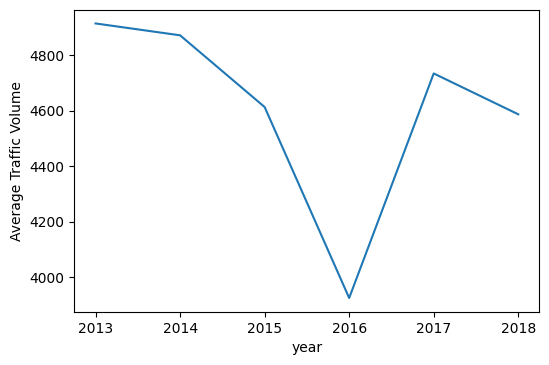

In [60]:
july_year['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.show()

The traffic volume in July from 2013 to 2018 were typically high like other warm month expect for the July of 2016. However [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) points out that the interstate was under construction at the time, which neatly explains the drop in traffic volume during July of 2016

Hence, in general we can expect that the traffic is much heavier than the colder month

### Day of the week

In [68]:
# Calculate the average traffic volume by day of the week
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayoftheweek = day.groupby('dayofweek').mean()
by_dayoftheweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Note that here 0 is Monday and 6 is Sunday

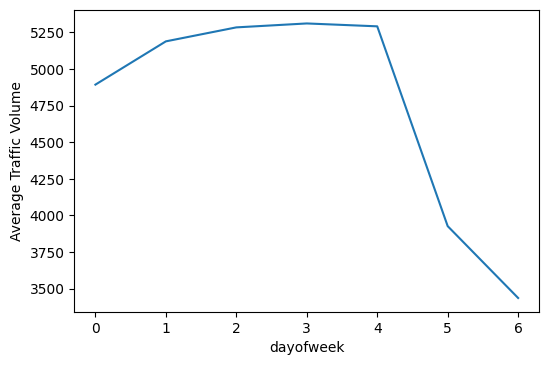

In [69]:
by_dayoftheweek['traffic_volume'].plot.line()
plt.ylabel('Average Traffic Volume')
plt.show()

The traffic is heavy during weekdays, except for Monday the average traffic volume exceeds 5000 cars. The traffic during the weekends is lighter with values below 4000 cars on average.

### Time of day

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [73]:
day['hour'] = day['date_time'].dt.hour
weekdays = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekday = weekdays.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

by_hour_weekday['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [74]:
by_hour_weekend['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

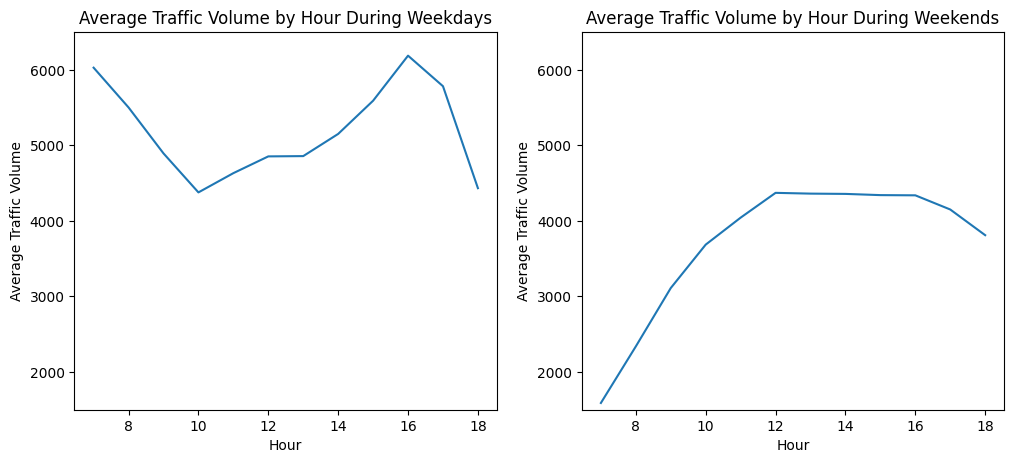

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
by_hour_weekday['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour During Weekdays')
plt.ylim([1500, 6500])
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlabel('Hour')
plt.ylabel('Average Traffic Volume')
plt.title('Average Traffic Volume by Hour During Weekends')
plt.ylim([1500, 6500])

plt.show

The traffic during the weekdays at each hour are heavier than that of the weekend

During the weekdays, the traffic is heaviest around 7 AM and 4 PM when people going from home to work and back.

To summarize:
* The traffic is generally heavier in the warmer months (March to October)
* The traffic during weekdays is heavier compared to weekend
* The traffic during weekdays, the rush hours are around 7 AM and 4 PM

## Weather Indicators

First, Let's find the correlation values between traffic_volume and the numerical weather columns.

In [82]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayoftheweek     -0.416453
hour              0.172704
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

It looks like temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.

(240.0, 320.0)

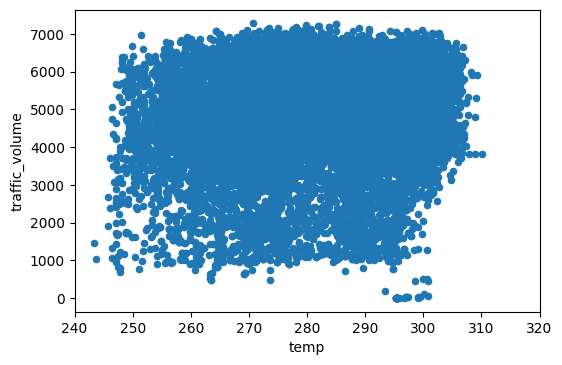

In [86]:
day.plot.scatter(x = 'temp', y = 'traffic_volume')
plt.xlim(240, 320) # two wrong 0K temperatures mess up the y-axis

The plot shows data points distribution is close to that of a uniform distribution, and thus indicates that the temperature column doesn't seem like a reliable indicator for heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

First, We're going to calculate the average traffic volume associated with each unique value in the weather_main column

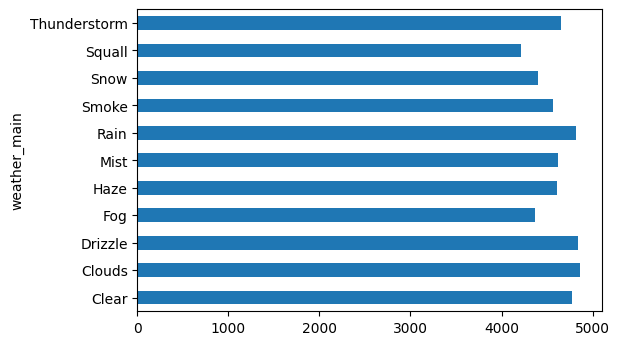

In [95]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is no weather type where traffic volume exceeding 5000 cars, hence none of the weather type is a good indicator for heavy traffic

Now, let's look at the weather_description column

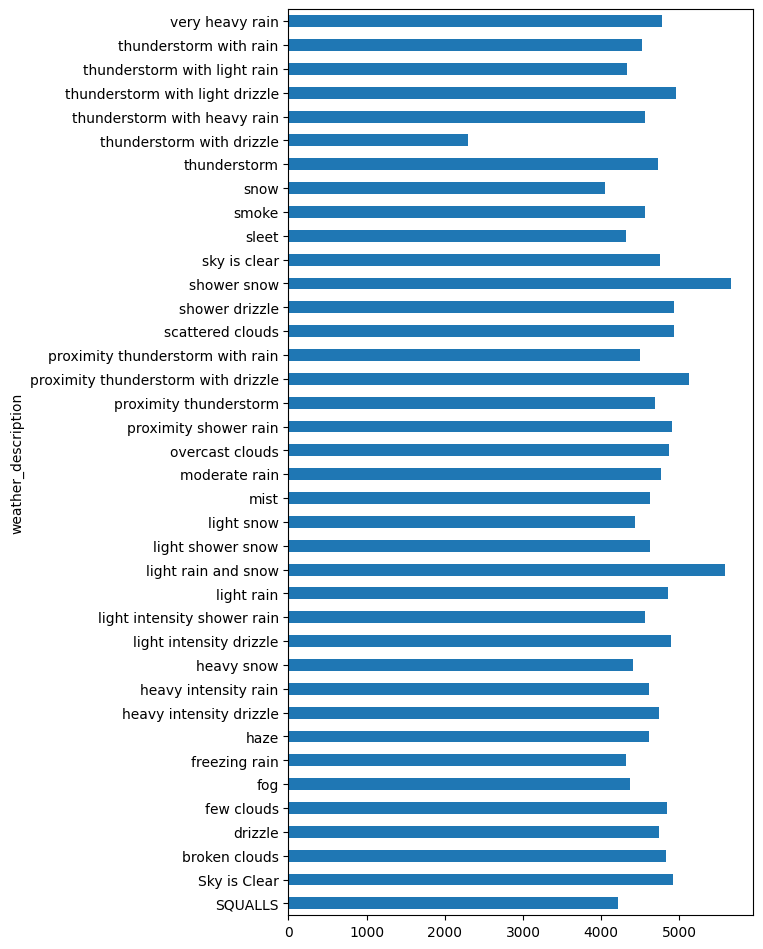

In [96]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(6, 12))
plt.show()

Strangely, the traffic volume exceeding 5,000 cars during: 
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle.

This may be due to more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators:
    * The traffic is heavier during the day.
    * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    *The traffic is usually heavier on business days compared to the weekends.
    *On business days, the rush hours are around 7 and 16.
* Weather indicators:
    * Shower snow.
    * Light rain and snow.
    * Proximity thunderstorm with drizzle.